# Assignment #3 - Neural Networks

<font color="blue"> <h3>Heet Detroja</h3></font>

# I. Overview

The objective here is to train a Neural Network for regression on the regression data we already used on Assign1, we will use  5-fold cross validation to find out the best neural network parameters and present them. The neural network will predict the appliances usage depending on the features in the dataset. We also implemented the Neural Network for Non-Linear Logistic Regression on the classification dataset we used in Assign2, we will again use 5-fold cross validation and find the best parameter and present the cross validation accuracies. Here, the neural network will classify if a reported incident is crime or not on the Denver dataset.

# II. Data

## Description of Data

The dataset used here for regression is appliances energy prediction dataset from the UCI machine learning repository.The dataset consists of 19735 data samples and 29 feature values,they are used to predict the energy consumption of appliances.The data samples were recorded for 4.5 months with time difference of 10 mins between each sample.The feature values of the data set are:
<br>
Date and time
<br>
Appliances energy consumption in Wh
<br>
Lights energy consumption in Wh
<br>
T1 = temperature in kitchen area in celsius
<br>
RH_1 = humidity in kitchen area in percentage
<br>
T2 = temperature in living room area in celsius
<br>
RH_2 = humidity in living room area in percentage
<br>
T3 = temperature in laundary room area in celsius
<br>
RH_3 = humidity in laundary room area in percentage
<br>
T4 = temperature in office room in celsius
<br>
RH_4 = humidity in office room in percentage
<br>
T5 = temperature in bathroom in celsius
<br>
RH_5 = humidity in bathroom in percentage
<br>
T6 = temperature outside the building (north side) in celsius
<br>
RH_6 = humidity outside the building (north side) in percentage
<br>
T7 = temperature in ironing room in celsius
<br>
RH_7 = humidity in ironing room in percentage
<br>
T8 = temperature in teenager room in celsius
<br>
RH_8 = humidity in teenager room in percentage
<br>
T9 = temperature in parents room in celsius
<br>
RH_9 = humidity in parents room in percentage
<br>
T_out = Temperature outside (from Chievres weather station) in degree Celsius
<br>
Press_mm_hg = Pressure (from Chievres weather station) in mm Hg
<br>
RH_out = Humidity outside (from Chievres weather station) in percentage
<br>
Wind speed =  (from Chievres weather station) in m/s
<br>
Visibility = (from Chievres weather station) in km
<br>
Tdewpoint = (from Chievres weather station) degree celsius
<br>
rv1 = Random variable 1
<br>
rv2 = Random variable 2
<br>
the two random variables are taken for testing the model and to filter out non predictive attributes.
The dataset and information is available on UCI machine learning repository.


### Reading the Data

Reading the .csv file for processing the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('energydata_complete.csv')

### Preprocessing the Data

Taking the mean of temperature and humidity for all the rooms to plot it on graph.

In [2]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('energydata_complete.csv')
col1 = dataset.loc[:,'T1']
col2 = dataset.loc[:,'T2']
col3 = dataset.loc[:,'T3']
col4 = dataset.loc[:,'T4']
col5 = dataset.loc[:,'T5']
col6 = dataset.loc[:,'T6']
col7 = dataset.loc[:,'T7']
col8 = dataset.loc[:,'T8']
col9 = dataset.loc[:,'T9']
tempmean = (col1+col2+col3+col4+col5+col6+col7+col8+col9)/9
col1 = dataset.loc[:,'RH_1']
col2 = dataset.loc[:,'RH_2']
col3 = dataset.loc[:,'RH_3']
col4 = dataset.loc[:,'RH_4']
col5 = dataset.loc[:,'RH_5']
col6 = dataset.loc[:,'RH_6']
col7 = dataset.loc[:,'RH_7']
col8 = dataset.loc[:,'RH_8']
col9 = dataset.loc[:,'RH_9']
hummean = (col1+col2+col3+col4+col5+col6+col7+col8+col9)/9

Checking for missing data

In [3]:
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Plots to Visualize Data,Reading and Analyzing the plots

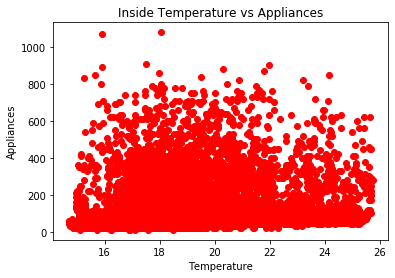

In [4]:
plt.scatter(tempmean,dataset["Appliances"],color='red')
plt.title("Inside Temperature vs Appliances")
plt.xlabel("Temperature")
plt.ylabel("Appliances")
plt.show()

### Inside Temperature vs Appliances
This scatter plots shows the effects of the temperatures of all the rooms on the appliances energy consumption,as we see few observations at 16 degree celcius have energy consumption as high as 1000 Wh this may be due to use of appliances like air condition to keep the low temperatures. 

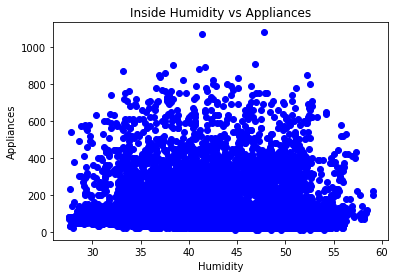

In [5]:
plt.scatter(hummean,dataset["Appliances"],color='blue')
plt.title("Inside Humidity vs Appliances")
plt.xlabel("Humidity")
plt.ylabel("Appliances")
plt.show()

### Inside Humidity vs Appliances
This scatter plots shows the effects of the humidity of all the rooms on the appliances energy consumption,as we see with humidity the appliance usage increases at 40 - 45 %. 


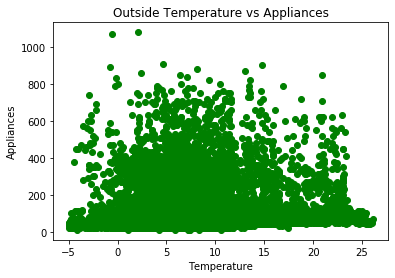

In [6]:
plt.scatter(dataset["T_out"],dataset["Appliances"],color='green')
plt.title("Outside Temperature vs Appliances")
plt.xlabel("Temperature")
plt.ylabel("Appliances")
plt.show()

### Outside Temperature vs Appliances
This scatter plots shows the effects of the outside temperature on the appliances energy consumption,as we see few observations at low temp have energy consumption as high as 1000 Wh this may be due to use of heater in low temperatures. 

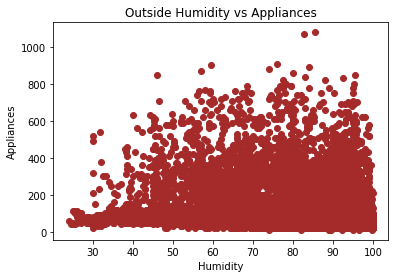

In [7]:
plt.scatter(dataset["RH_out"],dataset["Appliances"],color='brown')
plt.title("Outside Humidity vs Appliances")
plt.xlabel("Humidity")
plt.ylabel("Appliances")
plt.show()

### Outside Humidity vs Appliances
This scatter plots shows the effects of outside humidity on the appliances energy consumption,as we see with the increase in humidity the energy usage increases to keep the inside humidity and temperature at desired condition. 

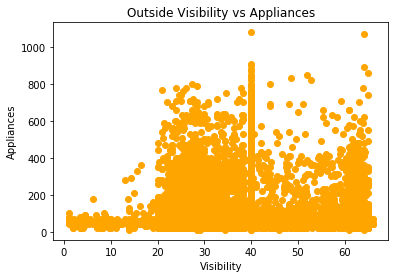

In [8]:
plt.scatter(dataset["Visibility"],dataset["Appliances"],color='orange')
plt.title("Outside Visibility vs Appliances")
plt.xlabel("Visibility")
plt.ylabel("Appliances")
plt.show()

### Outside Visibility vs Appliances
This scatter plots shows the effects of outside visibility on the appliances energy consumption,as we see with the visibilty changes with day and night the energy usage changes as lights will be used more during night and during day it would be less. 

Reading the data and preprocessing.

In [9]:
dt=pd.DataFrame(dataset.iloc[:,1])
d1=dataset.drop(['date','Appliances','rv1','rv2','Press_mm_hg'],axis=1)
d1.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Visibility,Tdewpoint
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,41.626667,18.2,48.900000,17.033333,45.53,6.600000,92.0,7.000000,63.000000,5.3
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,41.560000,18.2,48.863333,17.066667,45.56,6.483333,92.0,6.666667,59.166667,5.2
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,41.433333,18.2,48.730000,17.000000,45.50,6.366667,92.0,6.333333,55.333333,5.1
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,41.290000,18.1,48.590000,17.000000,45.40,6.250000,92.0,6.000000,51.500000,5.0
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,41.230000,18.1,48.590000,17.000000,45.40,6.133333,92.0,5.666667,47.666667,4.9


# III,IV. Methods and Results
## Summary for 5-fold Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models. It has a single parameter k that refers to number of samples the given dataset is going to be divided into. Here we choosing k=5 therefore it is 5-fold cross validation.After splitting the dataset into 5 parts we will choose one portion as testing sample and the rest as training sample, we will repeat the same process with each k-fold and get the best suited parameter for the neural network which gives the best results.

In [10]:
K=5
nfold=0
res=[]
testErrs=[]
def partition(x):
    partition= len (x)//K
    a=x[0:partition]
    b=x[partition:partition*2]
    c=x[partition*2:partition*3]
    d=x[partition*3:partition*4]
    e=x[partition*4:partition*5]
    partdata = [a,b,c,d,e]
    return partdata

bparameter=[]
final=[]
bparamlist=[]

def cross_validatation(X, Y, parameters):
    x_parti = partition(X)
    y_parti = partition(Y)
 
    for i in range(K): 
        x_test = x_parti[i]
        y_test = y_parti[i]
        rmse=[]
        params=[] 
        
        for j in range(K): 
            print("K is : ",j)
            if i == j: 
                continue 
            x_i = x_parti[j]
            y_i = y_parti[j]
            x_train = x_parti[not i and not j]
            y_train = y_parti[not i and not j]

            for param in parameters:
                model = NeuralNet(param)
                model.train(x_train, y_train)
                predicted = model.use(x_i)
                
                err = np.sqrt(mean_squared_error(y_i, predicted))
                testErrs.append(err)
                res.append(param)
                
            print(res)
            print(testErrs)
            print(min(testErrs))
            print(res[np.argmin(testErrs)])
            rmse.append(min(testErrs))
            params.append(res[np.argmin(testErrs)])
         
        print(params)
        print(rmse)
        print(res[np.argmin(rmse)])
        bparameter=res[np.argmin(rmse)]
        bmodel = NeuralNet(bparameter)
        
        x_train = x_parti[not i]
        y_train = y_parti[not i]
        bmodel.train(x_train, y_train)

        fpred = bmodel.use(x_test)
        ferr = np.sqrt(mean_squared_error(y_test,fpred))
        final.append(ferr)
        bparamlist.append(bparameter)

    return final,bparamlist

### Explanation of Code 

Here we have two functions partition() and cross_validation(). The partition() is used to divide the data into k number of folds , here we have given k as 5 so the function will divide the dataset into 5 parts. The cross_validation() will first take the input data and partition the target as well as features into train and test dataset of 5 parts. Then we will iterate through the data ,first for loop iterates through the 5 parts of the data to get one part as the test dataset and the rest as training.Next for loop will iterate and take the data which will be used for validation part ,so the rest of the data will used of training, after this we will use all the parameters passed to see which parameter gives the best results in the NeuralNet class on that training data. We will store all these parameters and results and get the best one from it.Then we will again call the NeuralNet class with the best parameter. This will iterate through all the 5 folds and get the best parameters for the NeuralNet.

## B. Summary of Nonlinear Regression 

Nonlinear regression is a regression in which the dependent or criterion variables are modeled as a non-linear function of model parameters and one or more independent variables.While a linear equation has one basic form, nonlinear equations can take many different forms. Nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables.Our goal is to minimize the sum of all squares.The best-fit curve is often assumed to be that which minimizes the sum of squared residuals. This is the ordinary least squares (OLS) approach. However, in cases where the dependent variable does not have constant variance, a sum of weighted squared residuals may be minimized; see weighted least squares. Each weight should ideally be equal to the reciprocal of the variance of the observation, but weights may be recomputed on each iteration, in an iteratively weighted least squares algorithm.

## Neural Network

In [11]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [12]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                #import pdb;pdb.set_trace()
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            #import pdb;pdb.set_trace()
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

## Explanation of Codes

Here we have two classes Standardizer class and NeuralNet class. Standardizer class will normalize all the values. The NeuralNet class will build a neural network that will give the predictions.<br>
nlayers is number of hidden units,rho is the learning rate,W is the weights.<br>
The nunit will take number of input,hidden and output units, the pack and unpack functions will take the weights of all layers and turns into one vector and vice versa respectively.Forward pass will propagate the network by multiplying the weights with the input layer further the activation function will make the network non-linear.The backward pass will take the target and error as input and the weights are updated accordingly.<br>
The train funtion will take in the input features and target data, gradientf will unpack the weights then calls the forward pass function, further it calculates the error based on forward pass after which back propagation takes target and error as input and updates the weights.<br>

## Presentation of CV Results and Non-Linear Regression Results

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
dataset=pd.read_csv('energydata_complete.csv')
dt=pd.DataFrame(dataset.iloc[:,1])
d1=dataset.drop(['date','Appliances','rv1','rv2','Press_mm_hg'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(np.array(d1),np.array(dt), test_size=0.25, random_state=42)

In [14]:
import warnings 
warnings.filterwarnings('ignore')
models = [[24,12,1],[24,16,1],[24,20,1], [24,24,1], [24,28,1]]

bestAccuracy,bestParam = cross_validatation(np.array(d1), np.array(dt), models)

K is :  0
K is :  1
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[179.46059920141047, 210.30540616112427, 242.48666751727544, 220.48241882102667, 271.6398947623063]
179.46059920141047
[24, 12, 1]
K is :  2
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[179.46059920141047, 210.30540616112427, 242.48666751727544, 220.48241882102667, 271.6398947623063, 237.84858440797402, 259.83400435945276, 212.50108638157653, 287.7939188324346, 316.26148046216804]
179.46059920141047
[24, 12, 1]
K is :  3
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[179.46059920141047, 210.30540616112427, 242.48666751727544, 220.48241882102667, 271.6398947623063, 237.84858440797402, 259.83400435945276, 212.50108638157653, 287.7939188324346, 316.26148046216804, 181.849

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[179.46059920141047, 210.30540616112427, 242.48666751727544, 220.48241882102667, 271.6398947623063, 237.84858440797402, 259.83400435945276, 212.50108638157653, 287.7939188324346, 316.26148046216804, 181.84972486745204, 246.18050726861452, 359.2611631982336, 261.11530391464146, 206.70

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[179.46059920141047, 210

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

In [15]:
print(bestAccuracy,bestParam)

[149.56837609322474, 188.81547776320244, 209.06961122221043, 151.65943930001058, 155.1318722779833] [[24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1]]


In [16]:
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(np.array(d1),np.array(dt), test_size=0.25, random_state=42)

In [17]:
import warnings 
warnings.filterwarnings('ignore')
model=NeuralNet([24,12,1])  
model.train(x_train,y_train,niter=1000)

{'w': array([ 4.51896308e+00,  5.76674683e+00,  8.87224726e-01,  1.84848640e+00,
        -7.92854247e-01, -4.42393782e-01, -8.36883557e-01,  1.48873901e+00,
         7.33031810e-01, -1.37104524e+00,  5.03779817e-01,  9.09845495e-01,
        -8.80645679e-01, -2.71154855e-01, -8.77657150e-02,  3.52310108e-01,
         2.02344596e-02, -3.23317173e-01,  1.87159448e-01, -3.34066297e-01,
        -9.61875121e-02,  3.02942272e-01, -6.81256177e-02, -4.02490835e-01,
        -5.52936026e-01,  1.82134383e+00, -1.89079404e+00,  1.13708824e+00,
         4.88104618e-01,  4.94229178e-01,  1.93983442e+00, -8.16959885e-01,
         1.13654347e+00,  7.29048203e-01,  1.28254561e+00,  3.56978335e-01,
        -4.18692046e+00, -9.95660574e-01, -6.06152024e-01,  2.82144272e-01,
         2.13424680e+00, -8.39235358e-01,  6.69010533e-01, -2.89494989e-01,
        -2.43311293e+00,  3.73909727e-01, -2.48455571e+00, -1.98991167e+00,
         3.77167268e+00,  3.86541939e+00,  1.51480124e+00, -1.88703085e+00,
       

In [18]:
y_pred=model.use(x_test)

## Discussions about parameter/network structure choice

Here we have 3 layers of neural network.Input layer of size 24 as we have 24 features and output layer of 1 unit as we are predicting one target variable. In cross validation we have repeated the training of neural network with different number of hidden units on different parts of the data. Here we see that we have most of the best results with the hidden units size as 12 and we can observe that the as the number of hidden units increase the model does not improve hence we can say that the model is not performing well. These are the best values and their parameters we received [149.56837609322474, 188.81547776320244, 209.06961122221043, 151.65943930001058, 155.1318722779833] [[24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1]]

## Plots for results

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 85.15650383258128


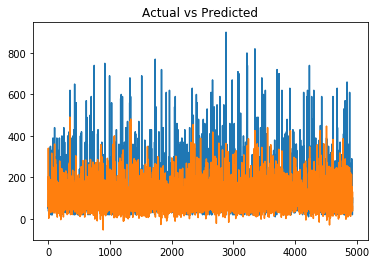

In [20]:
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Actual vs Predicted")
plt.show()

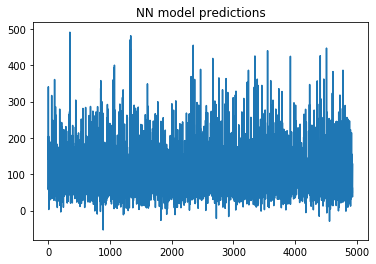

In [21]:
plt.plot(y_pred)
plt.title("NN model predictions")
plt.show()

## Discussion about the prediction results

We have RMSE value of 85.15650383258128 after performing nonlinear regression using neural network on the regression dataset. These were the results with 24 input units , 12 hidden units and 1 output unit. We chose 12 number of hidden units as it gave the best results in cross validation and suits our data.We have tanh activation function . If we increase the number of hidden units the model does not perform well, hence using just 12 hidden units.We can see the plot out predictions really fits our actual data.So we got the best parameters from the cross validation.


##  Nonlinear Logistic Regression

## Data Description

The Dataset used here is Denver Crime Data from Kaggle datasets.The dataset consists of 35000+ data samples and 11 feature values.The data here classifies whether the offense was a crime or not.<br>

OFFENSE_ID : it is a unique id for each offense.<br>
INCIDENT_ID : it is a unique id for an occurence of offenses.<br>
OFFENSE_CODE : it is a unique id for a particular type of offense.<br>
OFFENSE_CODE_EXTENSION : it is used to describe a subset of another type crime.<br>
OFFENSE_TYPE_ID : provides the actual name for the offense in lamens terms.<br>
OFFENSE_CATEGORY_ID : provides a more general categorization for crimes.<br>
FIRST_OCCURENCE_DATE : is the first possible date/time of the offense.<br>
LAST_OCCURENCE_DATE : is the last possible time of the offense.<br>
REPORTED_DATE : is the time at which the offense was reported to the police.<br>
INCIDENT_ADDRESS : is the location of the offense.<br>
GEO_X : is the state plane (city of Denver standard projection) for the offense location.<br>
GEO_Y : is the state plane (city of Denver standard projection) for the offense location.<br>
GEO_LON : is the longitude of the location of the offense.<br>
GEO_LAT : is the latitudes of the location of the offense.<br>
DISTRICT_ID : is the district in charge of handling the offense.<br>
PRECINCT_ID : is the precinct in charge of handling the offense.<br>
NEIGHBORHOOD_ID : is the neighborhood the offense occurred in.<br>
IS_CRIME : states whether the offense was a crime.<br>
IS_TRAFFIC : states whether offense is traffic accident or not.<br>

### Reading the Data 

Reading the .csv file.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset=pd.read_csv('crime.csv')

## Plots for Understanding or Analysis

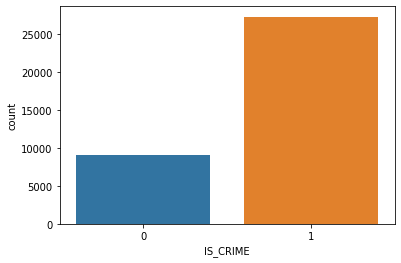

In [23]:
sns.countplot(dataset['IS_CRIME'],label="Count")
plt.show()

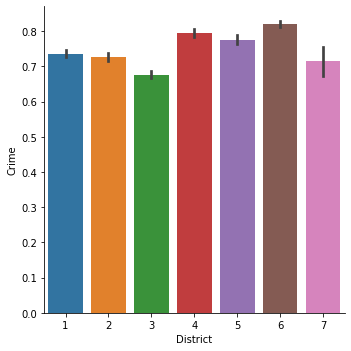

In [24]:
sns.catplot(x='DISTRICT_ID',y='IS_CRIME',data=dataset,kind='bar').set_axis_labels("District","Crime")
plt.show()

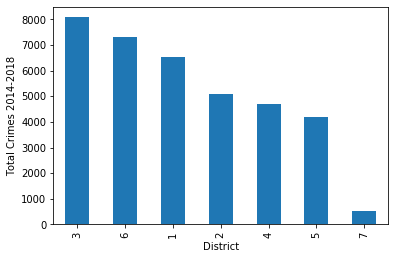

In [25]:
dataset['DISTRICT_ID'].value_counts().plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Total Crimes 2014-2018')
plt.show()

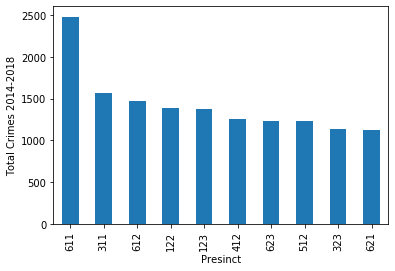

In [26]:
dataset['PRECINCT_ID'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Presinct')
plt.ylabel('Total Crimes 2014-2018')
plt.show()

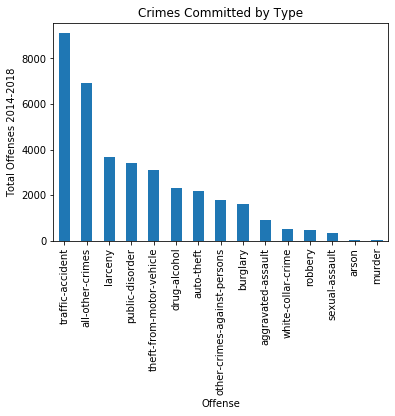

In [27]:
dataset['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.title('Crimes Committed by Type')
plt.xlabel('Offense')
plt.ylabel('Total Offenses 2014-2018')
plt.show()

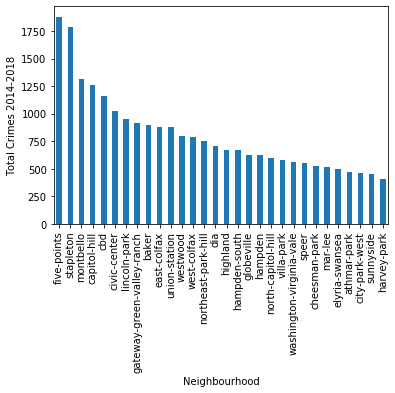

In [28]:
dataset['NEIGHBORHOOD_ID'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Crimes 2014-2018')
plt.show()

## Preliminary Observation

The Plots above show us that:

1.<b>Countplot for crime</b> : The first graph is the countplot for crime.This shows how many offenses are crime under the law.It can be observed that most of the offenses reported are crimes.<br>

2.<b>Plot for district</b> : This plot shows the probability of the offense being a crime in the different districts.We can observe that district 6 has the highest probability of the offenses being reported in the area as crime while district 3 has the lowest probability of the offense being reported a crime.<br>

3.<b>Plot for crime(2014-2018)</b> : This graph shows the crimes of different districts through 4 years.We can observe that district 3 has most number of crimes while district 7 has the least number of crimes.While districts 2,4 and 5 have almost the same number of crimes in 4 years.<br>

4.<b>Plot for crime(2014-2018) for presinct</b> : This is graph for number of crimes in past 4 years in the different presinct.We can observe that presint 611 which falls under district 6 has the most number of crimes while presinct 323 under district 3 and presinct 621 under district 6 have the lowest number of crimes.<br>

5.<b>Plot for offense</b> : This graph shows the different offense types in last 4 years.We can observe that traffic-accident is the leading offense in this while murder is the lowest offense classified as crime in last 4 years.<br>

6.<b>Plot for Neighbourhood</b> : This graph shows different neighbourhood and the number of crimes that happened in last 4 years.We can see that five point and stapleton has two of the highest number of crimes reported while globeville,hampden and north-capitol-hill neighbourhoods have lowest reported crimes in last 4 years.<br>

## Summary for Non-Linear Logistic  Regression

Logistic regression is a statistical method for predicting binary classes. It is a special type of regression in which the goal is to model the probability of something as a function of other variables. In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a activation function that can map any real value between 0 and 1. In nonlinear logistic regression we add extra layers the hidden layers with which the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output.

In [29]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))


    
    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)

    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

## Explanation of Code

Here we have NeuralNetLogReg class which has a call to the consturctor for initializing the values to nLayers.Where,<br>
nLayer is the number of layers.<br>
rho is the learning rate.<br>
W is the weights.<br>
The train funcion here will take the features data which are 3 and and the target as input.Similar to previous NeuralNet class the gradientf() will unpack the weights by callin unpack.Then similar to NeuralNet class we will call the forward() which will multiply the weights with the input and update them after which back propagation is called which will take the target and error as input.The use() will call forward() to update the weights and give the predicted probablity and labels .

In [30]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.metrics import roc_curve, auc

## Examination of Correct Implementation with toy data

Text(0.5, 1.0, 'test data set')

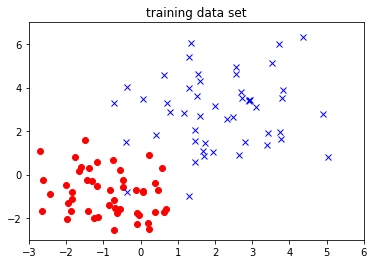

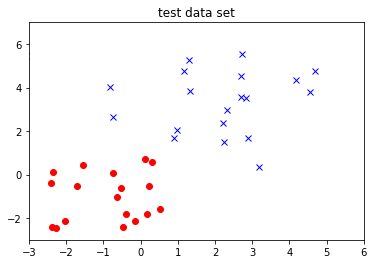

In [31]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [32]:
# Apply Nonlinear Logistic Regression
from imp import reload
#import warnings 
#warnings.filterwarnings('ignore')

clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

In [33]:
classes

array([[-0.95628069, -0.95536402],
       [-0.95948432, -0.95867052],
       [-0.77333395, -0.78086788],
       [-0.95431006, -0.95797078],
       [-0.94137602, -0.94047417],
       [-0.95635493, -0.9554385 ],
       [-0.95321206, -0.9523764 ],
       [-0.95351659, -0.95268518],
       [ 1.14167927,  1.13850968],
       [-1.00832126, -1.01196065],
       [-0.95684817, -0.95593094],
       [-0.9991579 , -1.00279921],
       [-0.95539051, -0.95450765],
       [ 1.24771293,  1.24925414],
       [-0.68610268, -0.68545435],
       [-0.98658091, -0.98653554],
       [-0.47603803, -0.47891039],
       [-0.91076371, -0.91485133],
       [-1.00750593, -1.01114668],
       [ 0.33375991,  0.33335262],
       [ 1.0134223 ,  1.00789364],
       [ 1.2041896 ,  1.21534988],
       [ 1.02043078,  1.01477343],
       [ 1.0132392 ,  1.00758897],
       [ 1.0193949 ,  1.01378368],
       [ 1.07531652,  1.07421546],
       [ 1.01965384,  1.01399723],
       [ 1.02043256,  1.01477518],
       [ 1.01876221,

In [34]:
Y

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

Accuracy:  50.0 %


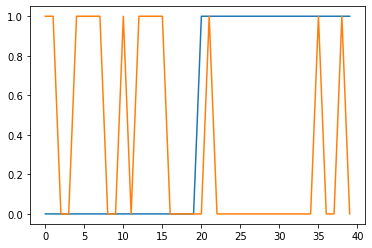

In [35]:
plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

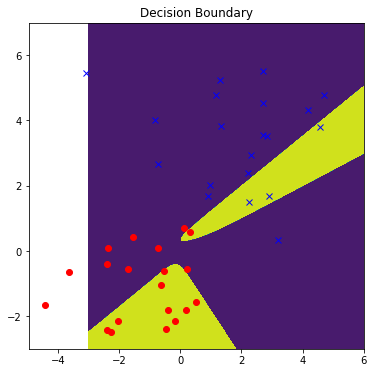

In [36]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

## Discussion about Dummy Data

We tested the code with dummy data it worked fine with an accuracy of 50%.

## Cross Validation for Non-Linear Logistic Regression

In [37]:
from sklearn.metrics import accuracy_score
K=5
nfold=0
res=[]
testErrs=[]
def partition(x):
    partition= len (x)//K
    a=x[0:partition]
    b=x[partition:partition*2]
    c=x[partition*2:partition*3]
    d=x[partition*3:partition*4]
    e=x[partition*4:partition*5]
    partdata = [a,b,c,d,e]
    return partdata

best_parameter=[]
final=[]

def cross_validatation(X, Y, parameters):
    x_parti = partition(X)
    y_parti = partition(Y)
 
    for i in range(K): 
        print("Number: ",i)
        x_test = x_parti[i]
        y_test = y_parti[i]

        rmse=[]
        params=[] 
        
        for j in range(K): 
            print("K is : ",j)
            if i == j: 
                continue 
            x_i = x_parti[j]
            y_i = y_parti[j]
            x_train = x_parti[not i and not j]
            y_train = y_parti[not i and not j]
            paramlist=[]
            acclist=[]
            for param in parameters:
                model = NeuralNetLogReg(param)
                model.train(x_train, y_train)
                prob,label = model.use(x_i)
                T=y_i[:,1]
                T=np.where(T==0,1,0)
                T=T.astype(int)
                acc = accuracy_score(T, label)
                acclist.append(acc)
                res.append(param)
                
            print(res)
            print(acclist)
            print(max(acclist))
            print(res[np.argmax(acclist)])
            acclist.append((acc))
            params.append(res[np.argmax(acclist)])
         
        print(params)
        print(acc)
        print(res[np.argmax(acc)])
        bparameter=res[np.argmax(acc)]
        bmodel = NeuralNetLogReg(bparameter)
        
        x_train = x_parti[not i]
        y_train = y_parti[not i]
        bmodel.train(x_train, y_train)

        final_prob,flabel = bmodel.use(x_test)
        Ttest=y_test[:,0]
        Ttest=np.where(Ttest==0,1,0)
        Ttest=Ttest.astype(int)
        final_acc= accuracy_score(Ttest, flabel)

    return final_acc

Explanation of Code at beginning of the section.

## Presentation of CV  results

In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd
dataset1=pd.read_csv('crime.csv')
dt1=pd.DataFrame(dataset1.iloc[:,-1])
d11=dataset1[['DISTRICT_ID','PRECINCT_ID','OFFENSE_CODE']]
XTrain, XTest, YTrain, YTest = train_test_split(np.asarray(d11), np.asarray(dt1), test_size=0.25, random_state=42)

In [39]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [40]:
T = add_ones(np.array(dt1).reshape(-1,1))
a=(np.ones((YTrain.shape[0], 1)))
b=a[:,0]==1
T=np.asmatrix(T)
T[:,1]=T[:,0]
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==1]=0
T=T.astype(int)

In [41]:
models = [[3,6,2], [3,9,2],[3,12,2], [3,15,2]]
bestAccuracy = (cross_validatation(np.array(d11),np.asarray(T), models))

Number:  0
K is :  0
K is :  1
[[3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2]]
[1.0, 1.0, 0.0, 0.0]
1.0
[3, 6, 2]
K is :  2
[[3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2]]
[1.0, 1.0, 1.0, 1.0]
1.0
[3, 6, 2]
K is :  3
[[3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2]]
[1.0, 0.0, 0.0, 0.0]
1.0
[3, 6, 2]
K is :  4
[[3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2]]
[0.180744403241313, 0.0, 1.0, 1.0]
1.0
[3, 12, 2]
[[3, 6, 2], [3, 6, 2], [3, 6, 2], [3, 12, 2]]
1.0
[3, 6, 2]
Number:  1
K is :  0
[[3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2]]
[0.0, 0.

[[3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2]]
[0.049855789039967034, 1.0, 0.9324268644416975, 0.21109737673396511]
1.0
[3, 9, 2]
K is :  2
[[3, 6, 2], [3, 9, 2], [3, 12, 2], [3, 15, 2], [3, 6, 2], [3, 9, 2], [3, 12, 2

## Non-Linear Logistic Regression Results

In [42]:
T = add_ones(np.array(YTrain).reshape(-1,1))
a=(np.ones((YTrain.shape[0], 1)))
b=a[:,0]==1
T=np.asmatrix(T)
T[:,1]=T[:,0]
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==1]=0
T=T.astype(int)

In [43]:
nn = NeuralNetLogReg([3,15,2])
nn.train(sc.fit_transform(XTrain), np.asarray(T),optim='scg') 
p,label1 = nn.use(sc.fit_transform(XTest))

In [44]:
y_pred1=label1
y_test1=np.where(YTest==1,0,1)
print('Accuracy:', accuracy_score(y_test1, y_pred1))

Accuracy: 0.7424741814985717


## Discussions about parameter/network structure choice

Here we have a neural network of 3 layers with 3 number of input units as their as three feature values in the dataset and 2 output units as we are prediction the probability and the labels. We have taken different number of hidden layers using cross validation tested it on the data. We got the best result with 15 hidden layers which is accuracy of 100% , as we increase the number of hidden layers the accuracy goes on increasing as we got an accuracy of 74% with 5 units and 9 hidden units gave an accuracy of 96% hence we can say that the model is overfitting the data. The model is not learning but it is memorizing and predicting the output. Finally, we have used [3,15,2] as the best parameter which gave best results.

## Plots for Results

In [45]:
cf3=confusion_matrix(y_test1, label1)
cf3
TP=cf3[1][0]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]


In [46]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [47]:
print('Precision: ' ,precision)
print('Recall: ' ,recall)

Precision:  1.0
Recall:  0.5


Text(0.5, 1, 'Confusion Matrix')

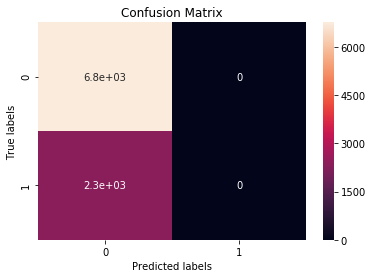

In [48]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

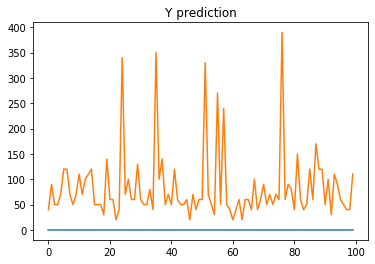

In [49]:
plt.title("Y prediction")
plt.plot(label1[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

## Discussion about the prediction results

We have performed Nonlinear logistic regression using neural networks. We trained the neural network with 12 hidden units as it was the best fit for our model as it gave good results we have Precision of 1.0 Recall of 0.5 on our dataset.We chose these parameters as it gave best results on cross validation.On increasing the number of units the accuracy of the model kept on increasing. The Neural net gave an accuracy of 74% with 12 hidden units in our data. 

# Conclusions

Here we have implemented Neural Networks. We have learned to implement K-fold Cross Validation on our data, which taught us to select best parameters for our network for which we got the best accuracy.We have also implemented different activation fucntions which showed us the difference an activation function can make to our neural network.Challenges faced in the assignment were to implement K-fold cross validation as we had to implement it without using any libraries.  

# References

[1] https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction
<br>
[2] Mooney, Paul. Denver Crime Data. 9 Jan. 2019, https://www.kaggle.com/paultimothymooney/denver-crime-data.
<br>
[3] Lee, Prof. Minwoo Jake. "Notebook on ML Methodology." Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-ML-Methodology.ipynb.
<br>
[4] Lee, Prof. Minwoo Jake. "Notebook on Neural  Networks." Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural-Networks.ipynb.
<br>
[5] Lee, Prof. Minwoo Jake. "Notebook on NonlinearLogReg." Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb.
<br>
[6] Stephanie. Nonlinear Regression: Simple Definition & Examples. 9 Dec. 2017, https://www.statisticshowto.datasciencecentral.com/nonlinear-regression/.
<br>
[7] Nonlinear Regression. https://www.statisticssolutions.com/regression-analysis-nonlinear-regression/.

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function).

In [50]:
dataset=pd.read_csv('energydata_complete.csv')
dt=pd.DataFrame(dataset.iloc[:,1])
d1=dataset.drop(['date','Appliances','rv1','rv2','Press_mm_hg'],axis=1)

# Tanh

In [51]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [52]:
K=5
nfold=0
res=[]
testErrs=[]
def partition(x):
    partition= len (x)//K
    a=x[0:partition]
    b=x[partition:partition*2]
    c=x[partition*2:partition*3]
    d=x[partition*3:partition*4]
    e=x[partition*4:partition*5]
    partdata = [a,b,c,d,e]
    return partdata

best_parameter=[]
final=[]
best_paramlist=[]

def cross_validatation(X, Y, parameters):
    x_parti = partition(X)
    y_parti = partition(Y)
 
    for i in range(K): 
        x_test = x_parti[i]
        y_test = y_parti[i]
        rmse=[]
        params=[] 
        
        for j in range(K): 
            print("K is : ",j) 
            x_i = x_parti[j]
            y_i = y_parti[j]
            x_train = x_parti[not i and not j]
            y_train = y_parti[not i and not j]
            
            for param in parameters:
                model = NeuralNet(param)
                model.train(x_train, y_train)
                predicted = model.use(x_i)
                
                err = np.sqrt(mean_squared_error(y_i, predicted))
                testErrs.append(err)
                res.append(param)
                
            print(res)
            print(testErrs)
            print(min(testErrs))
            print(res[np.argmin(testErrs)])
            rmse.append(min(testErrs))
            params.append(res[np.argmin(testErrs)])
         
        print(params)
        print(rmse)
        print(res[np.argmin(rmse)])
        bparameter=res[np.argmin(rmse)]
        bmodel = NeuralNet(bparameter)
        
        x_train = x_parti[not i]
        y_train = y_parti[not i]
        bmodel.train(x_train, y_train)

        fpred = bmodel.use(x_test)
        ferr = np.sqrt(mean_squared_error(y_test,fpred))
        final.append(ferr)
        bparamlist.append(bparameter)

    return final,bparamlist

In [53]:
import warnings 
warnings.filterwarnings('ignore')
models = [[24,12,1],[24,16,1],[24,20,1], [24,24,1], [24,28,1]]

bestAccuracy,bestParam = cross_validatation(np.array(d1), np.array(dt), models)

K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[150.17780233530772, 185.7226647728936, 198.87158140215473, 183.41618353148633, 243.47439515928963]
150.17780233530772
[24, 12, 1]
K is :  1
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[150.17780233530772, 185.7226647728936, 198.87158140215473, 183.41618353148633, 243.47439515928963, 188.87588216420596, 205.13556209351603, 208.582880790772, 301.70383696901513, 230.64752535702536]
150.17780233530772
[24, 12, 1]
K is :  2
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[150.17780233530772, 185.7226647728936, 198.87158140215473, 183.41618353148633, 243.47439515928963, 188.87588216420596, 205.13556209351603, 208.582880790772, 301.70383696901513, 230.64752535702536, 297.04385307757815,

K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[150.17780233530772, 185.7226647728936, 198.87158140215473, 183.41618353148633, 243.47439515928963, 188.87588216420596, 205.13556209351603, 208.582880790772, 301.70383696901513, 230.64752535702536, 297.04385307757815, 184.4796903413164, 212.9879969180214, 223.73146722480163

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[150.17780233530772, 185

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

In [54]:
print(bestAccuracy,bestParam)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(np.array(d1),np.array(dt), test_size=0.25, random_state=42)

[157.42698492393208, 220.28612969243682, 159.90330988362115, 155.04835552875673, 196.0057607073249] [[24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1]]


In [72]:
import warnings 
warnings.filterwarnings('ignore')
model=NeuralNet([24,12,1])  
model.train(x_train,y_train,niter=1000)

{'w': array([ 2.28388415e-01,  4.77198358e-02, -3.89047330e-02, -4.56057160e-02,
        -2.32863901e-02,  6.87657159e-02,  8.44214500e-02, -7.58010244e-02,
         1.44431049e-02, -7.74141005e-02,  3.25242701e-02,  3.03622669e-03,
         7.05831071e-02,  7.89003131e-02, -1.66330683e-02,  8.30579932e-02,
         2.52761393e-01, -3.78112939e-01,  1.47131914e-01, -4.24710030e-01,
        -1.68442515e-01,  3.97865048e-02,  7.72326722e-03, -8.88765052e-02,
         1.78305016e-01, -1.89343290e-01,  3.17894112e-02,  1.37471498e-01,
        -1.46944689e-01, -1.56607886e-01,  2.05076288e-01, -6.75604610e-02,
         6.70489535e-02, -4.50991287e-02, -7.68772988e-02, -5.94726530e-02,
        -1.09960865e-01,  2.25735350e-01,  1.51639023e-01,  3.09784473e-01,
         1.76917382e-01, -6.71073519e-03, -3.34610195e-03, -1.08579819e-01,
        -8.91170342e-02, -6.69025740e-02, -6.64486829e-02, -5.98428147e-03,
        -1.34839858e-01, -1.03791387e-01, -7.54647335e-03,  1.03854554e-01,
       

In [73]:
y_p=model.use(x_test)

In [74]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_p)))

RMSE: 91.03197592423614


# Sigmoid

In [58]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.Sigma(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (np.exp(-Z[i])/(1+np.exp(-Z[i]))**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [59]:
K=5
nfold=0
res=[]
testErrs=[]
def partition(x):
    partition= len (x)//K
    a=x[0:partition]
    b=x[partition:partition*2]
    c=x[partition*2:partition*3]
    d=x[partition*3:partition*4]
    e=x[partition*4:partition*5]
    partdata = [a,b,c,d,e]
    return partdata

best_parameter=[]
final=[]
best_paramlist=[]

def cross_validatation(X, Y, parameters):
    x_parti = partition(X)
    y_parti = partition(Y)
 
    for i in range(K): 
        x_test = x_parti[i]
        y_test = y_parti[i]
        rmse=[]
        params=[] 
        
        for j in range(K): 
            print("K is : ",j) 
            x_i = x_parti[j]
            y_i = y_parti[j]
            x_train = x_parti[not i and not j]
            y_train = y_parti[not i and not j]

            for param in parameters:
                model = NeuralNet(param)
                model.train(x_train, y_train)
                predicted = model.use(x_i)
                
                err = np.sqrt(mean_squared_error(y_i, predicted))
                testErrs.append(err)
                res.append(param)
                
            print(res)
            print(testErrs)
            print(min(testErrs))
            print(res[np.argmin(testErrs)])
            rmse.append(min(testErrs))
            params.append(res[np.argmin(testErrs)])
         
        print(params)
        print(rmse)
        print(res[np.argmin(rmse)])
        bparameter=res[np.argmin(rmse)]
        bmodel = NeuralNet(bparameter)
        
        x_train = x_parti[not i]
        y_train = y_parti[not i]
        bmodel.train(x_train, y_train)

        fpred = bmodel.use(x_test)
        ferr = np.sqrt(mean_squared_error(y_test,fpred))
        final.append(ferr)
        bparamlist.append(bparameter)

    return final,bparamlist

In [60]:
import warnings 
warnings.filterwarnings('ignore')
models = [[24,12,1],[24,16,1],[24,20,1], [24,24,1], [24,28,1]]

bestAccuracy,bestParam = cross_validatation(np.array(d1), np.array(dt), models)

K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[114.03666644574369, 113.82229254250612, 116.64118361012743, 114.85054715949794, 114.01393532209599]
113.82229254250612
[24, 16, 1]
K is :  1
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[114.03666644574369, 113.82229254250612, 116.64118361012743, 114.85054715949794, 114.01393532209599, 110.45978810175747, 104.7279557232795, 103.80744082604812, 105.29614460532635, 100.72540147394068]
100.72540147394068
[24, 28, 1]
K is :  2
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[114.03666644574369, 113.82229254250612, 116.64118361012743, 114.85054715949794, 114.01393532209599, 110.45978810175747, 104.7279557232795, 103.80744082604812, 105.29614460532635, 100.72540147394068, 136.9925508885

K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[114.03666644574369, 113.82229254250612, 116.64118361012743, 114.85054715949794, 114.01393532209599, 110.45978810175747, 104.7279557232795, 103.80744082604812, 105.29614460532635, 100.72540147394068, 136.99255088855455, 133.9192772131934, 151.4326609700163, 150.868654274678

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[114.03666644574369, 113

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

In [61]:
print(bestAccuracy,bestParam)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(np.array(d1),np.array(dt), test_size=0.25, random_state=42)

[113.50525155250882, 103.70220482506318, 144.68469903221302, 137.55186097184904, 107.06347496590325] [[24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 16, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1]]


In [75]:
import warnings 
warnings.filterwarnings('ignore')
model=NeuralNet([24,12,1])  
model.train(x_train,y_train,niter=1000)

{'w': array([-9.13821507e-02, -7.43196131e-02, -7.42934264e-02, -2.63324983e-02,
        -1.70260659e-02, -8.22907557e-02, -6.01834897e-02,  1.72066370e-01,
         6.12382072e-02,  4.07964468e-02,  1.63944551e-01, -1.03525471e-02,
         2.61889655e-02, -4.19306200e-01,  5.50279775e-02, -1.01690439e-01,
         2.17052181e-01, -1.15857490e-01,  2.11355631e-01,  5.06746216e-02,
        -3.90839024e-01, -1.92919747e-03, -2.63322696e-02,  1.95098950e-01,
         5.78862643e-03, -1.80351514e-01, -1.58266409e-02, -5.22738486e-02,
        -1.42269674e-01,  2.48174082e-02,  3.77039383e-02, -2.97478851e-01,
        -1.57491381e-01,  3.48294283e-03,  7.63839425e-02, -1.68791710e-01,
        -3.10321755e-02,  1.06348975e-01, -2.69027183e-02,  2.33490842e-02,
        -2.30711528e-02,  6.84147384e-02, -3.47341834e-02,  5.87614887e-01,
         5.69066245e-02,  6.12122936e-02, -1.06994605e-01,  1.05049946e-02,
         3.13368662e-02, -1.79295678e-01, -1.00282510e-01,  6.35998811e-02,
       

In [76]:
y_p=model.use(x_test)

In [77]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_p)))

RMSE: 91.00218282373179


# Relu

In [65]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)
    
    def ReLU(self, x):
        return x * (x > 0)

    def dReLU(self, x):
        return 1. * (x > 0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1. * Z[i])
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [66]:
K=5
nfold=0
res=[]
testErrs=[]
def partition(x):
    partition= len (x)//K
    a=x[0:partition]
    b=x[partition:partition*2]
    c=x[partition*2:partition*3]
    d=x[partition*3:partition*4]
    e=x[partition*4:partition*5]
    partdata = [a,b,c,d,e]
    return partdata

best_parameter=[]
final=[]
best_paramlist=[]

def cross_validatation(X, Y, parameters):
    x_parti = partition(X)
    y_parti = partition(Y)
 
    for i in range(K): 
        x_test = x_parti[i]
        y_test = y_parti[i]
        rmse=[]
        params=[] 
        
        for j in range(K): 
            print("K is : ",j) 
            x_i = x_parti[j]
            y_i = y_parti[j]
            x_train = x_parti[not i and not j]
            y_train = y_parti[not i and not j]
            
            for param in parameters:
                model = NeuralNet(param)
                model.train(x_train, y_train)
                predicted = model.use(x_i)
                
                err = np.sqrt(mean_squared_error(y_i, predicted))
                testErrs.append(err)
                res.append(param)
                
            print(res)
            print(testErrs)
            print(min(testErrs))
            print(res[np.argmin(testErrs)])
            rmse.append(min(testErrs))
            params.append(res[np.argmin(testErrs)])
         
        print(params)
        print(rmse)
        print(res[np.argmin(rmse)])
        bparameter=res[np.argmin(rmse)]
        bmodel = NeuralNet(bparameter)
        
        x_train = x_parti[not i]
        y_train = y_parti[not i]
        bmodel.train(x_train, y_train)

        fpred = bmodel.use(x_test)
        ferr = np.sqrt(mean_squared_error(y_test,fpred))
        final.append(ferr)
        bparamlist.append(bparameter)

    return final,bparamlist

In [67]:
import warnings 
warnings.filterwarnings('ignore')
models = [[24,12,1],[24,16,1],[24,20,1], [24,24,1], [24,28,1]]

bestAccuracy,bestParam = cross_validatation(np.array(d1), np.array(dt), models)

K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[142.88005934186586, 131.3975440657034, 138.83238905439646, 157.13663344921716, 154.8784330379361]
131.3975440657034
[24, 16, 1]
K is :  1
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[142.88005934186586, 131.3975440657034, 138.83238905439646, 157.13663344921716, 154.8784330379361, 132.3117823805211, 116.04742804971852, 105.70569111698323, 100.259666131895, 118.74737819335147]
100.259666131895
[24, 24, 1]
K is :  2
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[142.88005934186586, 131.3975440657034, 138.83238905439646, 157.13663344921716, 154.8784330379361, 132.3117823805211, 116.04742804971852, 105.70569111698323, 100.259666131895, 118.74737819335147, 124.26433922180166, 102.129

K is :  0
[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[142.88005934186586, 131.3975440657034, 138.83238905439646, 157.13663344921716, 154.8784330379361, 132.3117823805211, 116.04742804971852, 105.70569111698323, 100.259666131895, 118.74737819335147, 124.26433922180166, 102.1295985938467, 123.22113514400574, 148.14246152434268,

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1]]
[142.88005934186586, 131

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

[[24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1], [24, 20, 1], [24, 24, 1], [24, 28, 1], [24, 12, 1], [24, 16, 1]

In [68]:
print(bestAccuracy,bestParam)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(np.array(d1),np.array(dt), test_size=0.25, random_state=42)

[143.696585424182, 109.70376593204213, 107.74416327322163, 124.99323895010656, 172.63779470117908] [[24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 16, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 16, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1], [24, 12, 1]]


In [78]:
import warnings 
warnings.filterwarnings('ignore')
model=NeuralNet([24,12,1])  
model.train(x_train,y_train,niter=1000)

{'w': array([-9.58347879e-02,  1.41093281e-01, -1.97228497e-02, -1.08572733e-02,
        -1.92307270e-04, -4.00095680e-02,  3.37424640e-02, -7.58209775e-02,
        -1.50724554e-02,  1.62919214e-01,  9.37686790e-02, -1.01168813e-01,
         2.78437689e-02, -1.59942600e-01, -3.61077735e-01, -3.45969934e-02,
         1.56558945e-01, -3.02036811e-02, -3.27783657e-02,  4.77944629e-02,
        -5.83016598e-02,  4.02813741e-02,  9.89372271e-02, -2.95737829e-01,
        -7.07818922e-03,  9.70748668e-02, -9.55268336e-02,  1.37672904e-02,
        -9.97088790e-02, -7.65497569e-02, -3.34581984e-02,  1.58848202e-02,
        -7.74905497e-02, -1.67440543e-01, -2.15210997e-01, -7.40525313e-02,
        -5.73679551e-02, -8.35547280e-02, -1.23835032e-01, -3.72238972e-03,
         2.48406793e-01, -1.03818884e-02,  1.88156459e-01,  1.84725367e-03,
        -7.56146664e-03,  4.60065755e-01,  1.15981224e-01,  3.47230597e-02,
        -4.00503747e-02,  1.15276096e-01, -1.25871597e-01,  7.47722456e-02,
       

In [79]:
y_p=model.use(x_test)

In [80]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_p)))

RMSE: 91.12886608093287


<b>Tanh:</b><br>
RMSE: 91.03197592423614<br>
<b>Sigmoid:</b><br>
RMSE: 91.00218282373179<br>
<b>Relu:</b><br> 
RMSE: 91.12886608093287 <br>